## Load Data

In [32]:
# %%timeit
import random
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from time import time
from os import getcwd
from os.path import join

path = join(getcwd().rstrip('src'), 'data/owid-covid-data.csv').replace('\\', '/')
data = pd.read_csv(path)

# 1. Use your first matplotlib tool to find out  any strange behaviour in OWID data.  There is no standard solution.  The purpose is to practice the tool and data.

In [33]:
# figures are exported to local storage
columns = list(data.columns)
# print(columns)

for i in range(len(columns)): #[5]
    try:
        print('{0}/{1} {2:.2f}%'.format(i, len(columns), i/len(columns)*100), end='\r')
        element = data[[columns[i]]]
        t = columns[i]
        x = element.index
        y = element.values.tolist()
        plt.figure(figsize=(16,9))
        plt.title(t, fontsize=15)
        plt.axhline(0, color='black')
        plt.axvline(0, color='black')
        plt.scatter(x, y,s=5)
        plt.xlabel('index', fontsize=15)
        plt.ylabel('value', fontsize=15)
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        path = join(getcwd().rstrip('src'), 'pic/BD_w6_hw_q1/BD_w6_hw_q1_{0}.jpg'.format(t).replace('\\', '/'))
        plt.draw()
        plt.savefig(path, dpi=300)
        plt.close()
    except Exception as e:
        plt.close()
        print('Column "' + element.columns[0] + '" contains unacceptable type. '  + str(e))
print('Finished plotting.')

Column "iso_code" contains unacceptable type. could not convert string to float: 'AFG'
Column "continent" contains unacceptable type. could not convert string to float: 'Asia'
Column "location" contains unacceptable type. could not convert string to float: 'Afghanistan'
Column "date" contains unacceptable type. could not convert string to float: '2020-02-24'
Column "tests_units" contains unacceptable type. could not convert string to float: 'tests performed'
Finished plotting.


## Result
Pictures: [https://github.com/belongtothenight/BD_ML_Code/tree/main/pic/BD_w6_hw_q1](https://github.com/belongtothenight/BD_ML_Code/tree/main/pic/BD_w6_hw_q1)
1. Lots of columns contains NA data.
2. Some columns are recored less and less as time and value increase.
3. Some locations doesn't have continuous data, result in hug gap between groups of data.

# 2. Try to make two total_cases vs. date on one single graph with proper annotations on the graph.  I did not show this in the video.  You need to check my cheatsheet and google to get the solution.
=> location1 total_cases vs. date<br>
=> location2 total_cases vs. date

## Get Location Data

In [34]:
# Get location
locs = list(set(data.location)) # some elements are not locations
locs.remove('Upper middle income')
locs.remove('Low income')
locs.remove('Lower middle income')
locs.remove('International')
locs.remove('High income')
# print(locs)
l1 = random.choice(locs)
l2 = random.choice(locs)
print(l1)
print(l2)

Honduras
China


In [35]:
# Get location data
l1d = data.loc[data['location']==l1]
l2d = data.loc[data['location']==l2]
print(len(l1d))
print(len(l2d))
l1d.head(5)
# l2d.head(5)

928
977


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
86143,HND,North America,Honduras,2020-03-11,2.0,2.0,NaN,NaN,NaN,NaN,...,2.0,NaN,84.169,0.7,75.27,0.634,NaN,NaN,NaN,NaN
86144,HND,North America,Honduras,2020-03-12,2.0,0.0,NaN,NaN,NaN,NaN,...,2.0,NaN,84.169,0.7,75.27,0.634,NaN,NaN,NaN,NaN
86145,HND,North America,Honduras,2020-03-13,2.0,0.0,NaN,NaN,NaN,NaN,...,2.0,NaN,84.169,0.7,75.27,0.634,NaN,NaN,NaN,NaN
86146,HND,North America,Honduras,2020-03-14,2.0,0.0,NaN,NaN,NaN,NaN,...,2.0,NaN,84.169,0.7,75.27,0.634,NaN,NaN,NaN,NaN
86147,HND,North America,Honduras,2020-03-15,3.0,1.0,NaN,NaN,NaN,NaN,...,2.0,NaN,84.169,0.7,75.27,0.634,NaN,NaN,NaN,NaN


In [36]:
# Drop unused columns
columns = list(data.columns)
# print(len(columns))
# print(columns)
columns.remove('total_cases')
columns.remove('date')
# print(len(columns))
# print(columns)
for x in columns:
    del l1d[x]
    del l2d[x]
l1d.head(5)
# l2d.head(5)

,date,total_cases
86143,2020-03-11,2.0
86144,2020-03-12,2.0
86145,2020-03-13,2.0
86146,2020-03-14,2.0
86147,2020-03-15,3.0


In [37]:
# Convert data into list for plotting
l1date = list(l1d.date)
l1date = [datetime.strptime(date, '%Y-%m-%d').date() for date in l1date]
l1case = list(l1d.total_cases)
l2date = list(l2d.date)
l2date = [datetime.strptime(date, '%Y-%m-%d').date() for date in l2date]
l2case = list(l2d.total_cases)

## Plot

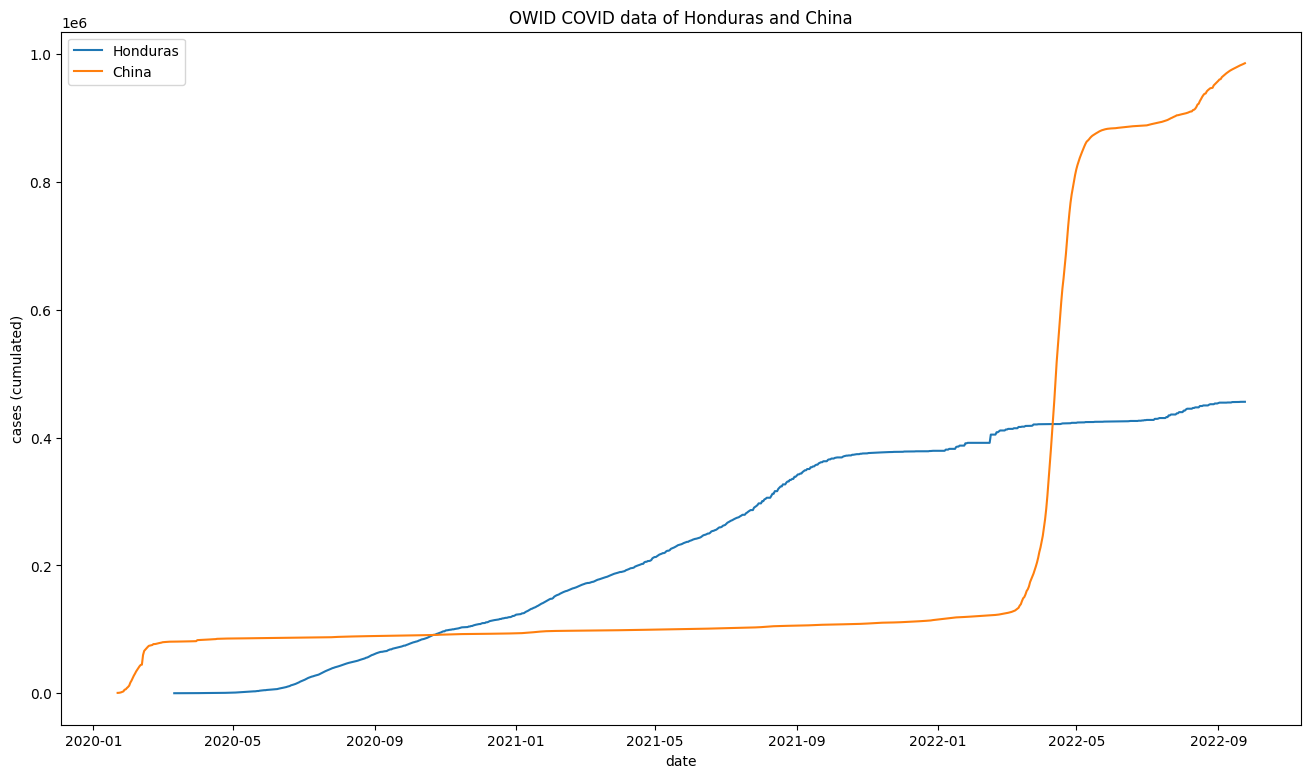

In [38]:
# figures are exported to local storage
%matplotlib inline
plt.figure(figsize=(16,9))
plt.title('OWID COVID data of {0} and {1}'.format(l1, l2))
plt.xlabel('date')
plt.ylabel('cases (cumulated)')
line1 = plt.plot(l1date, l1case, label=l1)
line2 = plt.plot(l2date, l2case, label=l2)
plt.legend()

# export plot
path = join(getcwd().rstrip('src'), 'pic/BD_w6_hw_q2/BD_w6_hw_q2_{0}_{1}.jpg'.format(l1, l2)).replace('\\', '/')
plt.draw()
plt.savefig(path, dpi=300)

## Result
Pictures: [https://github.com/belongtothenight/BD_ML_Code/tree/main/pic/BD_w6_hw_q2](https://github.com/belongtothenight/BD_ML_Code/tree/main/pic/BD_w6_hw_q2)